## Best car model


**Read the source file:**

In [1]:
# import pandas,numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv("evdataset.csv")
df

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


## Cleansing Dataframe

<div class="alert alert-block alert-info">

    
<p> Duplicate rows :Checked, There is no duplicate rows in Dataframe <p>
<p> Nan Values: No Nan Values in the dataframe<p>
<p>Data types: By using info() function I can see all datatypes are good.<p>
<p>Unnecessary columns: I decided to drop few unnecessary columns such as Link / City - cold weather / Highway-cold weather/ combined- cold weather  columns.<p>


In [2]:
# used shape to obtain the shape (dimensions) of DataFrame, how many rows and columns.
df.shape

(194, 27)

In [91]:
#The expression df.isnull().sum().sum() is used to calculate the total number of missing values in DataFrame.There is no NaN values in dataframe.
df.isnull().sum().sum()

0

In [92]:
df.isna().sum().sum()

0

In [3]:
#to get a concise summary of a DataFrame, including information about the index, columns, data types, and memory usage. It gives a quick overview of the DataFrame structure and useful details.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [4]:
#To check if there is any duplicates in Dataframe.
print(df.duplicated().sum())

0


**Check how many cars do we have for each Make in the dataset**

 <div class="alert alert-block alert-info">
   Value_counts() function used to counts how many times each make appears in the DataFrame.

In [90]:
#These counts represent the frequency of each car make in the 'Make' column of DataFrame.

df['Make'].value_counts()

Mercedes      24
Porsche       18
Audi          16
Volkswagen    13
Peugeot       12
Citroen       11
Toyota         8
BMW            8
MG             8
Fiat           8
Ford           7
Kia            6
Opel           6
Hyundai        5
Renault        5
Skoda          5
Tesla          4
Genesis        4
Volvo          4
CUPRA          4
Polestar       2
Honda          2
Smart          2
Hongqi         2
DS             1
JAC            1
Nissan         1
Lexus          1
Dacia          1
Mazda          1
Seres          1
Jaguar         1
Mini           1
Subaru         1
Name: Make, dtype: int64

<div class="alert alert-block alert-info">

**Correlation Analysis**

<p>Assumptions:
    <p>Location : UK
    <p>Requirements: Electric cars considering the large mileage
    <p>Analysis based on : 
           <p> 1. which make and model to buy
           <p> 2. which factors/variables are relevant to the decision
           <p>3.Perssuasive visuals

**Factors to consider :**
               
<p>For this business problem I will be analysing following variables:
   <p> 1. Electric Range 
    <p>2. Battery Capacity 
    <p>3. Fast charge speed
    <p>4. Combined Mild weather
    
    
**I did not used Cold weather columns as this is based on -10 celsuis which is not quite common in the UK weather.**

From the above points I decided to eleminate all the following columns: 

<p>City - Cold Weather
<p>Highway - Cold Weather
<p>Combined - Cold Weather
<p>Total Torque is also droped

Correlation analysis has performed to find out the relationship between each variable and the combined mild weather( which repersents the Mileage) to find out which of these variables mostly affecting the Mileage for the cars and which variables to ignore. 

In [6]:
# Specify the columns to exclude
exclude_columns = ['id', 'Make', 'City - Cold Weather', 'Highway - Cold Weather',
                   'Combined - Cold Weather', 'Total Torque']

# Get the remaining variables for correlation analysis
variables = df.columns.drop(exclude_columns)

# Calculate the correlation matrix
correlation_matrix = df[variables].corr()

# Print the correlation coefficients for 'Combined - Mild Weather'
print(correlation_matrix['Combined - Mild Weather'].sort_values(ascending=False))

Combined - Mild Weather        1.000000
Electric Range                 0.999340
Highway - Mild Weather         0.999207
City - Mild Weather            0.998164
Battery Capacity               0.847982
Top Speed                      0.703094
Fastcharge Speed               0.701561
Total Power                    0.628609
Charge Speed                   0.428057
Charge Power                   0.401656
Width                          0.257352
Gross Vehicle Weight (GVWR)    0.246900
Length                         0.201721
Wheelbase                      0.042971
Cargo Volume                  -0.156062
Max. Payload                  -0.387039
Seats                         -0.512409
Height                        -0.554953
Acceleration 0 - 100 km/h     -0.708977
Name: Combined - Mild Weather, dtype: float64


C:\Users\marja\AppData\Local\Temp\ipykernel_58412\1761482034.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[variables].corr()


C:\Users\marja\AppData\Local\Temp\ipykernel_58412\3187484834.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_values = df[independent_variables].corrwith(df[dependent_variable])


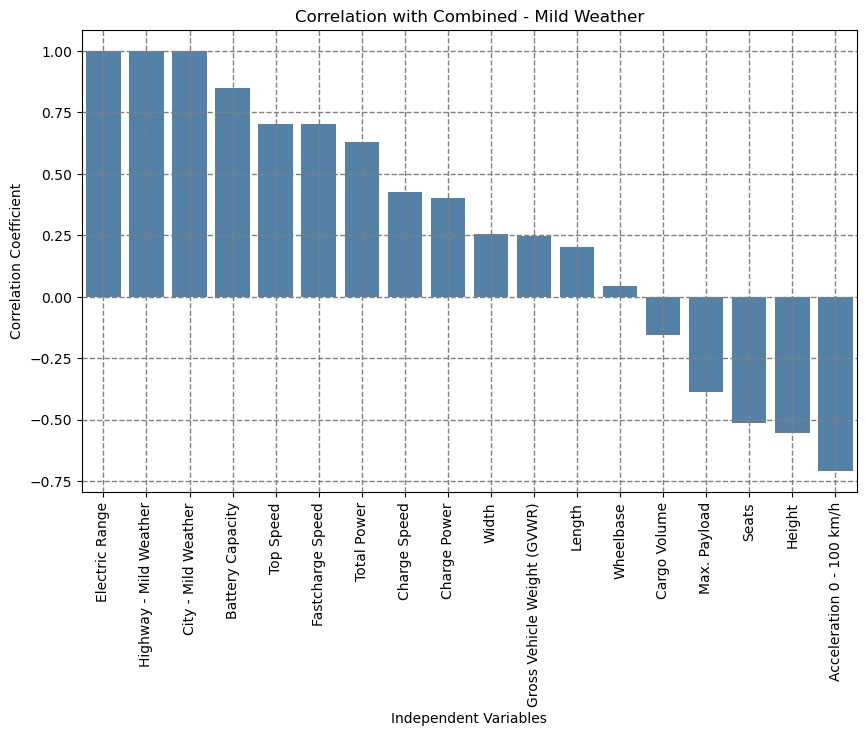

In [8]:
#Correlation graph To create a correlation graph to visualize the relationships between variables in a DataFrame.

dependent_variable = 'Combined - Mild Weather'
independent_variables = df.columns.drop([dependent_variable, 'id', 'Make', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather','Total Torque'])

# Calculate the correlation coefficients
correlation_values = df[independent_variables].corrwith(df[dependent_variable])

# Sort the correlation values in descending order
correlation_values_sorted = correlation_values.sort_values(ascending=False)

# Plot the sorted correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values_sorted.index, y=correlation_values_sorted.values, color='steelblue')

# Set labels and title
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.title(f'Correlation with {dependent_variable}')
plt.grid(color="grey", linewidth=1, linestyle="--")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()



<div class="alert alert-block alert-info">
    
<p>From the above we can conclude that the most relevant values that affect the mileage are the following:<p>

**Electric Range 0.999447**<p>
    
**Battery Capacity 0.889804**<p>
    
**Top Speed 0.798086**<p>
    
**Total Power 0.757569**<p>
**Fastcharge Speed 0.734428**<p>
**Acceleration 0 - 100 km/h -0.735191**<p>
<p>We can now plot those variables

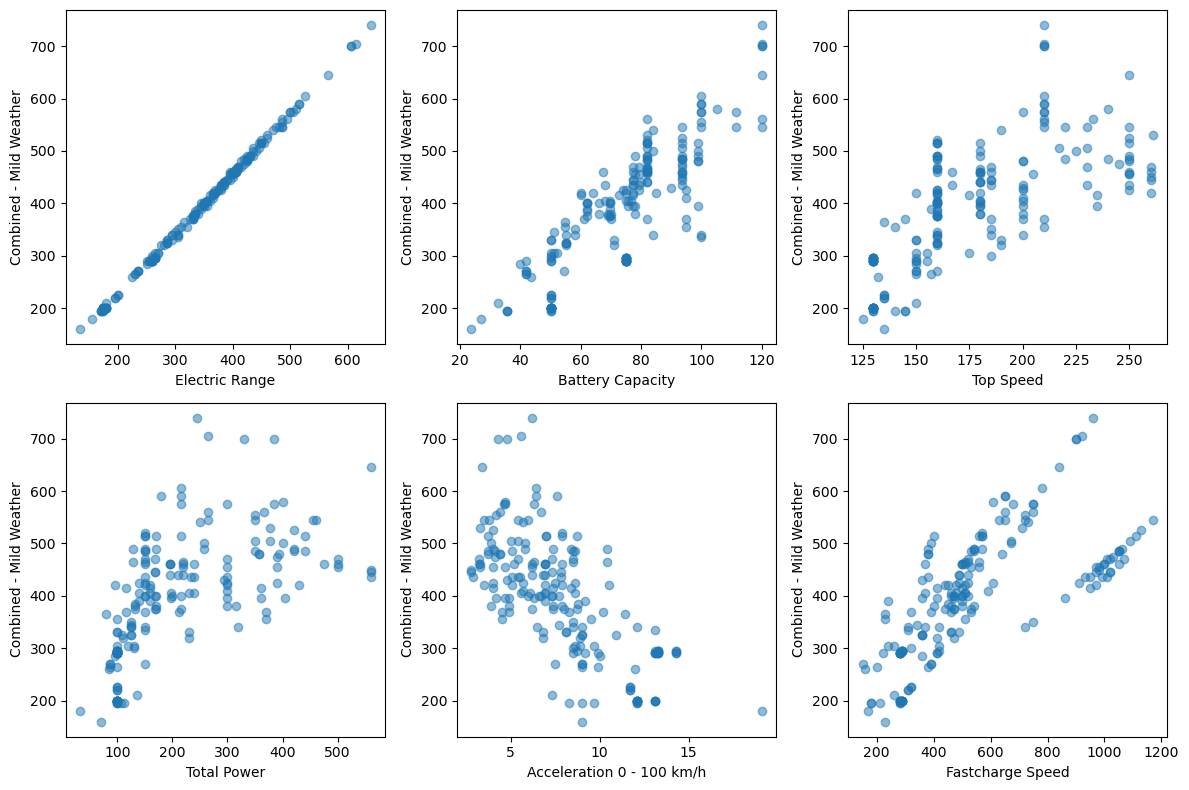

In [10]:
# Plot the scatter plots of variables
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()

for i, variable in enumerate(["Electric Range", "Battery Capacity", "Top Speed","Total Power", 
                              "Acceleration 0 - 100 km/h", "Fastcharge Speed"]):
    axs[i].scatter(df[variable], df['Combined - Mild Weather'], alpha=0.5)
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Combined - Mild Weather')

# Adjust the layout    
plt.tight_layout()

# Show the plot
plt.show()

From the above graphs we can see linear correlation between Combined_mild weather and Electric Range, Battery Capacity and FastCharge speed but there is no linear correlation with Total power. So I wont use this variable in my EDA analysis

<div class="alert alert-block alert-info">
We can also show the heatmap that displays the correlation between the variables

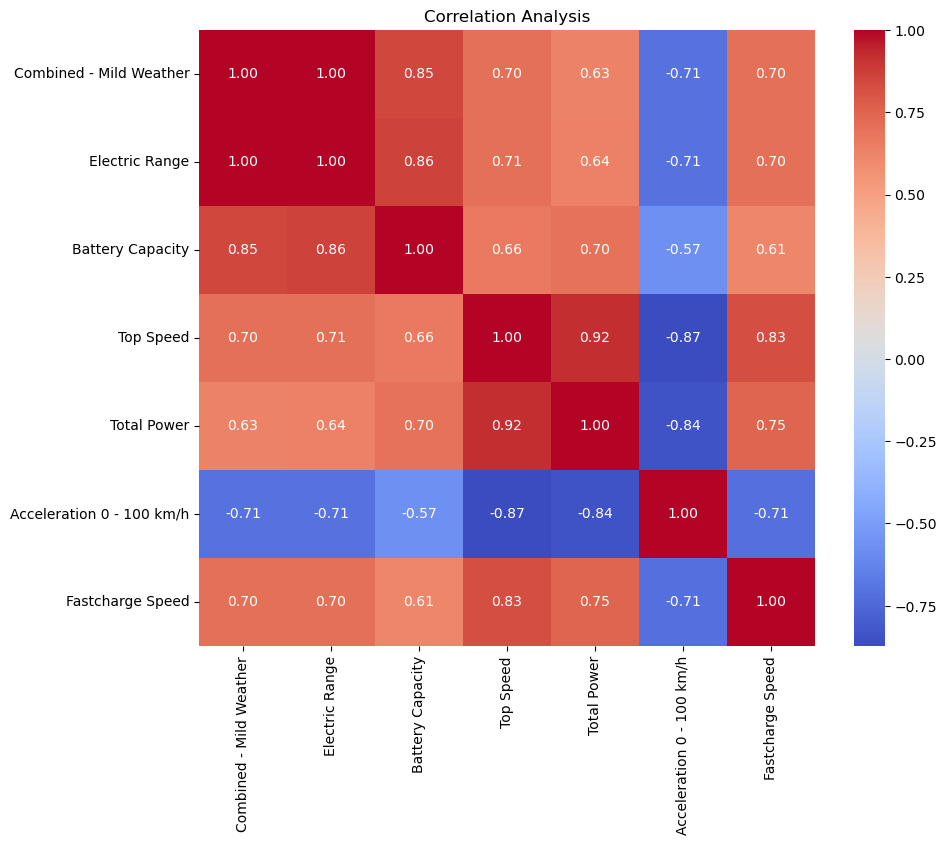

In [11]:
#Seaborn provides a convenient function called heatmap that can generate a correlation matrix and plot it as a heatmap
import seaborn as sns

variables = ['Combined - Mild Weather','Electric Range', 'Battery Capacity', 'Top Speed', 'Total Power',
             'Acceleration 0 - 100 km/h', 'Fastcharge Speed']

# Create a correlation matrix
correlation_matrix = df[variables].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title of the plot
plt.title('Correlation Analysis')

# Display the plot
plt.show()

<div class="alert alert-block alert-info">
    
**Top 5 car model considering Combined_Mild weather factor.**

In [76]:
#Sorted dataframe with Comibined_Mild weather and print the top 5 cars model.

Sorted_df1=df.sort_values(by='Combined - Mild Weather',ascending=False)
Top_5=Sorted_df1.head(5)
print("Top 5 cars by Combined -Mild weather:")
print(Top_5[['Make','id', 'Top Speed','Electric Range','Fastcharge Speed','Battery Capacity']])

Top 5 cars by Combined -Mild weather:
         Make    id  Top Speed  Electric Range  Fastcharge Speed  \
155  Mercedes  1483        210             640               960   
178  Mercedes  1699        210             615               920   
32   Mercedes  1484        210             605               900   
68   Mercedes  1700        210             605               900   
50   Mercedes  1537        250             565               840   

     Battery Capacity  
155             120.0  
178             120.0  
32              120.0  
68              120.0  
50              120.0  


C:\Users\marja\AppData\Local\Temp\ipykernel_58412\4178236095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5['id'] = Top_5['id'].astype(str)
C:\Users\marja\AppData\Local\Temp\ipykernel_58412\4178236095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5['Make_ID'] = Top_5['Make'] + ' ' + Top_5['id']


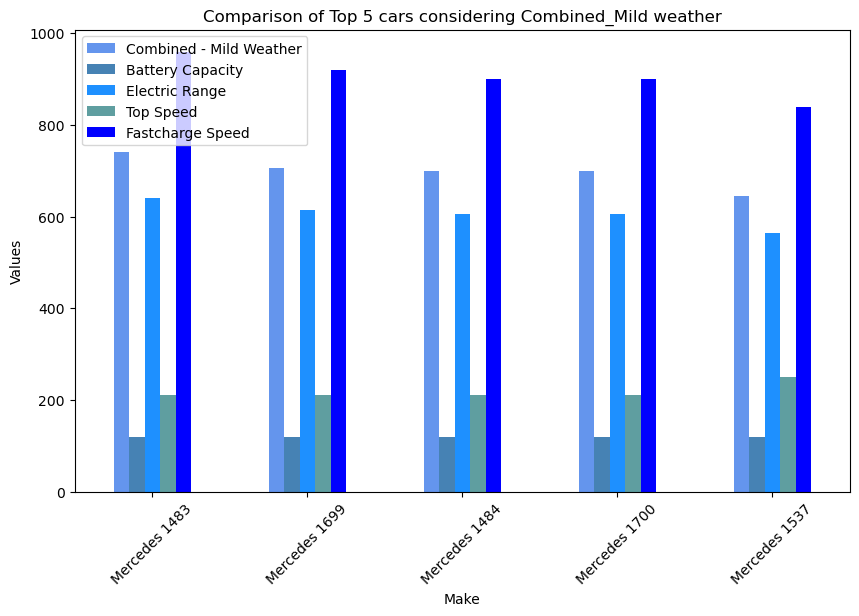

In [86]:
#Plot the top 5 car models considering Combined_mild weather.

# Making Make_ID variable for the plot to show specific car model ( make+id)
Top_5['id'] = Top_5['id'].astype(str)
Top_5['Make_ID'] = Top_5['Make'] + ' ' + Top_5['id']

# Plotting the bar chart
ax = Top_5[['Make_ID','Combined - Mild Weather','Battery Capacity','Electric Range','Top Speed','Fastcharge Speed']].plot(kind='bar', x='Make_ID', figsize=(10, 6),color=['#6495ED', '#4682B4', '#1E90FF', '#5F9EA0','#0000FF'])

# Adding labels and title
ax.set_xlabel("Make")
ax.set_ylabel("Values")
ax.set_title("Comparison of Top 5 cars considering Combined_Mild weather")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

<div class="alert alert-block alert-info">
    
**Top 5 car model considering Electric Range factor.**

In [65]:
#Sorting Dataframe by Electric Range to get the top 5 car models considering Electric Range.
Sorted_df1=df.sort_values(by='Electric Range',ascending=False)
Top_5_ElRange=Sorted_df1.head(5)
Top_5_ElRange['id'] = Top_5_ElRange['id'].astype(str)
Top_5_ElRange['Make_ID'] = Top_5_ElRange['Make'] + ' ' + Top_5_ElRange['id']

print("Top 5 cars by Electric Range:")
print(Top_5_ElRange[['Make_ID', 'Electric Range','Top Speed','Fastcharge Speed','Combined - Mild Weather']])

Top 5 cars by Electric Range:
           Make_ID  Electric Range  Top Speed  Fastcharge Speed  \
155  Mercedes 1483             640        210               960   
178  Mercedes 1699             615        210               920   
68   Mercedes 1700             605        210               900   
32   Mercedes 1484             605        210               900   
50   Mercedes 1537             565        250               840   

     Combined - Mild Weather  
155                      740  
178                      705  
68                       700  
32                       700  
50                       645  


C:\Users\marja\AppData\Local\Temp\ipykernel_58412\1624544734.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5_ElRange['id'] = Top_5_ElRange['id'].astype(str)
C:\Users\marja\AppData\Local\Temp\ipykernel_58412\1624544734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5_ElRange['Make_ID'] = Top_5_ElRange['Make'] + ' ' + Top_5_ElRange['id']


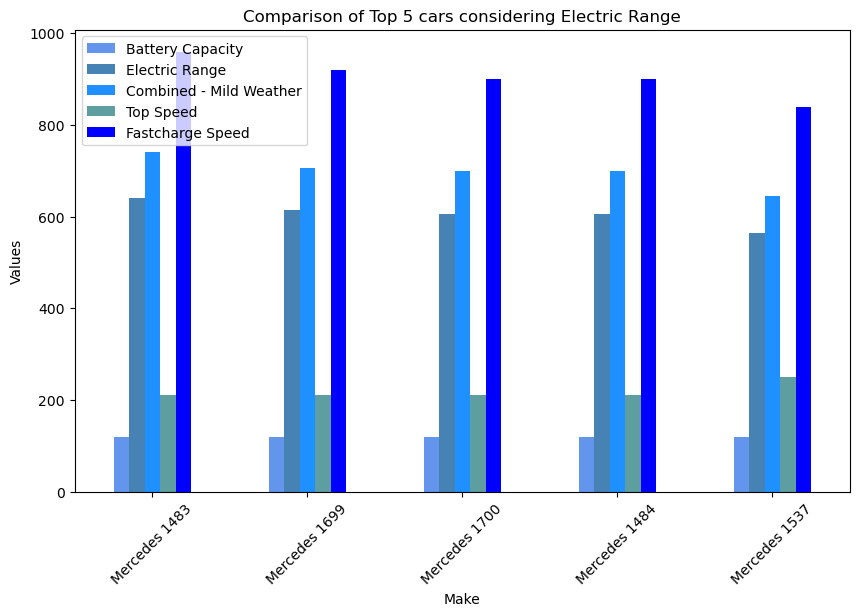

In [87]:
# Plotting the bar chart 
ax = Top_5_ElRange[['Make_ID','Battery Capacity','Electric Range','Combined - Mild Weather','Top Speed','Fastcharge Speed']].plot(kind='bar', x='Make_ID', figsize=(10, 6),color=['#6495ED', '#4682B4', '#1E90FF', '#5F9EA0','#0000FF'])

# Adding labels and title
ax.set_xlabel("Make")
ax.set_ylabel("Values")
ax.set_title("Comparison of Top 5 cars considering Electric Range")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

<div class="alert alert-block alert-info">
    
**Top 5 car model considering Battery Capacity factor.**

In [73]:
#Sorting Dataframe by Battery Capacity to see the top 5 car model/make considering Battery Capacity 
Sorted_df1=df.sort_values(by='Battery Capacity',ascending=False)
Top_5_Battery=Sorted_df1.head(5)
Top_5_Battery['id'] = Top_5_Battery['id'].astype(str)
Top_5_Battery['Make_ID'] = Top_5_Battery['Make'] + ' ' + Top_5_Battery['id']
print("Top 5 cars by Battery Capacity:")
print(Top_5_Battery[['Make_ID', 'Battery Capacity','Top Speed','Fastcharge Speed','Electric Range','Combined - Mild Weather']])

Top 5 cars by Battery Capacity:
           Make_ID  Battery Capacity  Top Speed  Fastcharge Speed  \
178  Mercedes 1699             120.0        210               920   
155  Mercedes 1483             120.0        210               960   
93   Mercedes 1674             120.0        210               630   
94   Mercedes 1673             120.0        210               650   
32   Mercedes 1484             120.0        210               900   

     Electric Range  Combined - Mild Weather  
178             615                      705  
155             640                      740  
93              485                      545  
94              495                      560  
32              605                      700  


C:\Users\marja\AppData\Local\Temp\ipykernel_58412\3062826300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5_Battery['id'] = Top_5_Battery['id'].astype(str)
C:\Users\marja\AppData\Local\Temp\ipykernel_58412\3062826300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5_Battery['Make_ID'] = Top_5_Battery['Make'] + ' ' + Top_5_Battery['id']


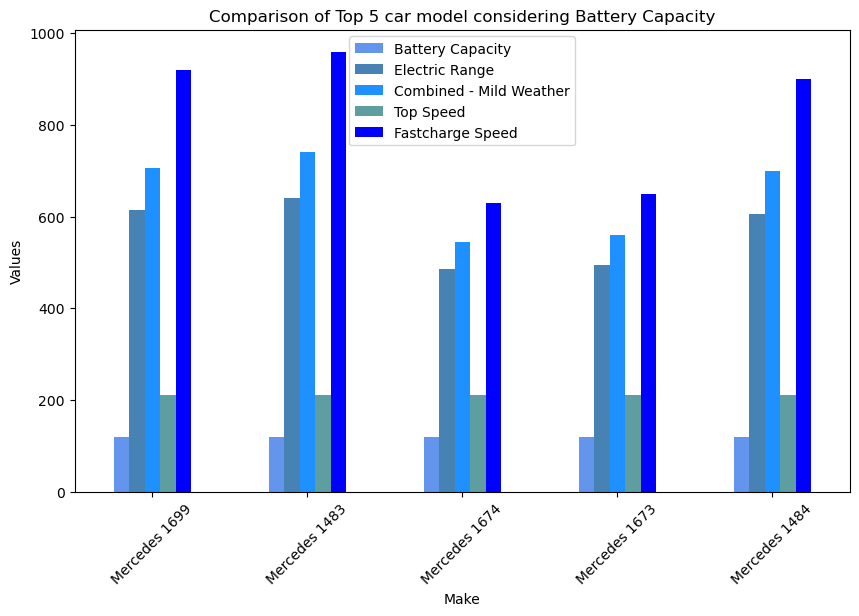

In [88]:
# Plotting the bar chart for cars with largest Battery capacity 
ax = Top_5_Battery[['Make_ID','Battery Capacity','Electric Range','Combined - Mild Weather','Top Speed','Fastcharge Speed']].plot(kind='bar', x='Make_ID', figsize=(10, 6),color=['#6495ED', '#4682B4', '#1E90FF', '#5F9EA0','#0000FF'])

# Adding labels and title
ax.set_xlabel("Make")
ax.set_ylabel("Values")
ax.set_title("Comparison of Top 5 car model considering Battery Capacity")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()




<div class="alert alert-block alert-info">
    
**Top 5 fastest car model in the dataset**

In [80]:
#Sorting Dataframe to get the 5 top fastest car 
sorted_df = df.sort_values(by='Top Speed', ascending=False)

# Get the top 5 fastest cars
top_5_fastest_cars = sorted_df.head(5)

print("Top 5 fastest cars:")
print(top_5_fastest_cars[['Make','id', 'Top Speed','Electric Range','Battery Capacity']])

Top 5 fastest cars:
        Make    id  Top Speed  Electric Range  Battery Capacity
177    Tesla  1620        261             460              82.0
9    Porsche  1625        260             405              93.4
43       Kia  1471        260             370              77.4
189  Porsche  1116        260             400              93.4
131  Porsche  1626        260             395              93.4


Text(0.5, 1.0, 'Top 5 fastest car')

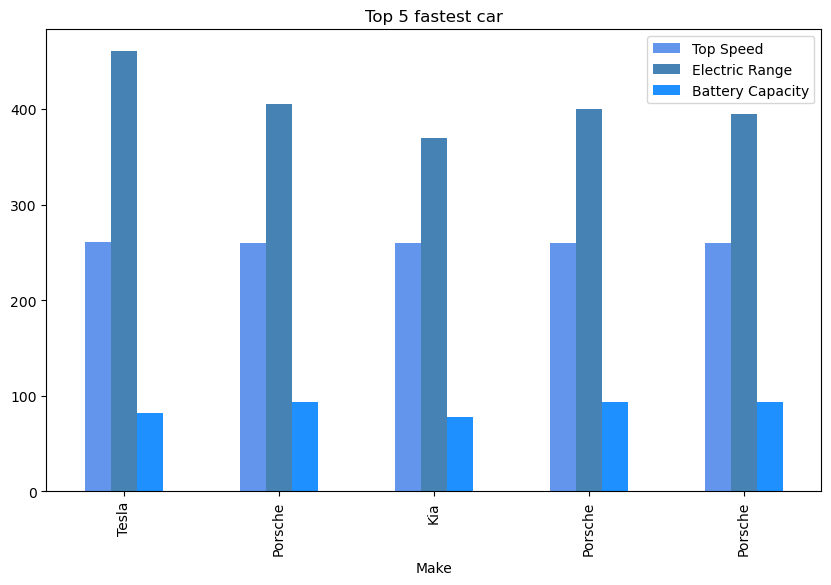

In [93]:
sorted_df = df.sort_values(by='Top Speed', ascending=False)
ax = top_5_fastest_cars[['Make', 'Top Speed', 'Electric Range', 'Battery Capacity']].plot(kind='bar', x='Make', figsize=(10, 6),color=['#6495ED', '#4682B4', '#1E90FF', '#5F9EA0','#0000FF'])
ax.set_title("Top 5 fastest car")

**Findings Summary**

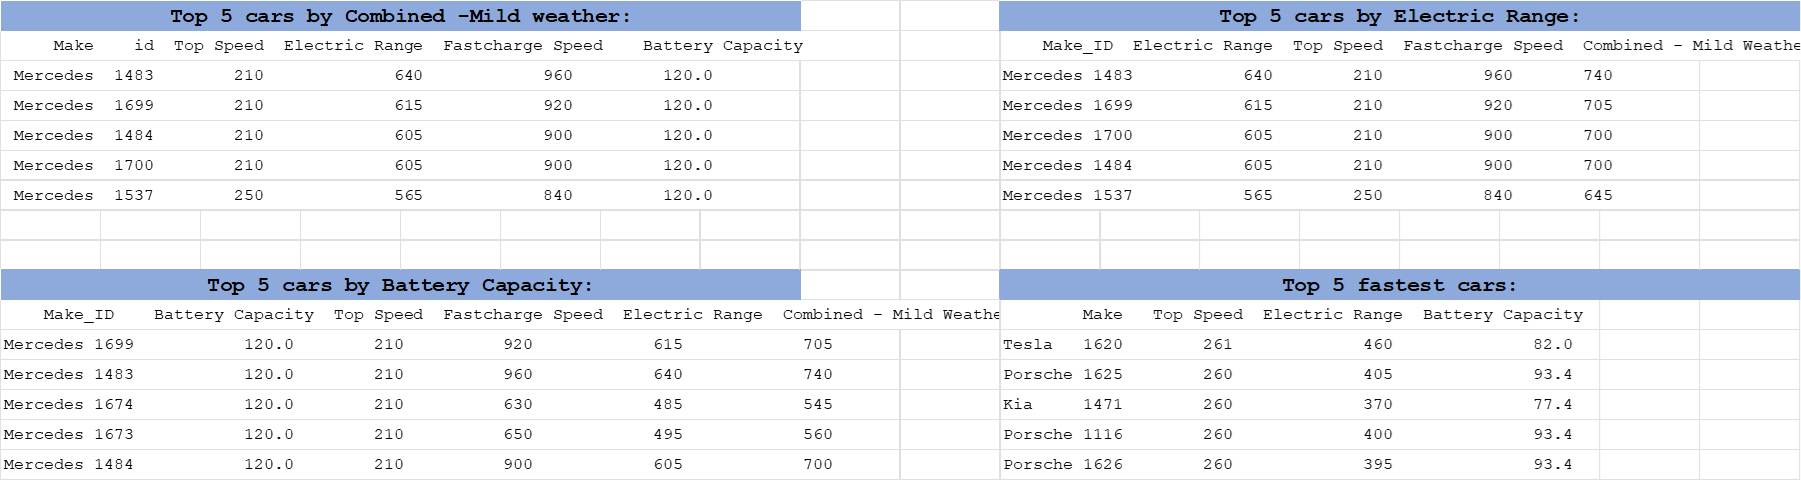

### Conclusion

From above Data analysis, the best car make that is recommanded to be bought, considering high mileage and Electric Range is 

 **Mercedes 1483**  Mercedes EQS
 
The second best recommandation considering Battery Capacity is 

 **Mercedes 1699**
 
 The fastest car recmmendation from the dataframe is  
 
 **Tesla 1620**